# <font size=10>__**NORTHWIND DATABASE ANALYSIS**__</font>

¨
 
## <font color="lightgreen" size=5>**> 00. LIBRARIES IMPORTATIONS**</font>

In [2]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tabulate import tabulate

¨
  
## <font color="lightgreen" size=5>**> 00. FUNCTIONS**</font>

In [3]:
def conn_db( query, columns ):
    with sqlite3.connect("C:/Program Files/DB Browser for SQLite/databases/Northwind.db") as conn:
        
        cursor = conn.cursor()
        cursor.execute( query )
        results = cursor.fetchall()
        df = pd.DataFrame( results, columns=columns )
    
    return df

¨
## <font color="lightgreen" size=5>**> 01. MOST SOLD PRODUCT**</font>


==[ MOST SOLD PRODUCTS (TOP 10) ]==
+---+----------------------+--------------------+-------+-------------+----------------+
|   |       PRODUCT        |    UNIT CONTENT    | PRICE | TOTAL SALES | TOTAL REVENUES |
+---+----------------------+--------------------+-------+-------------+----------------+
| 0 |  Gorgonzola Telino   |  12 - 100 g pkgs   | 12.5  |     458     |     5725.0     |
| 1 |  Camembert Pierrot   | 15 - 300 g rounds  | 34.0  |     430     |    14620.0     |
| 2 |    Steeleye Stout    | 24 - 12 oz bottles | 18.0  |     369     |     6642.0     |
| 3 | Raclette Courdavault |     5 kg pkg.      | 55.0  |     346     |    19030.0     |
| 4 |        Chang         | 24 - 12 oz bottles | 19.0  |     341     |     6479.0     |
| 5 |       Pavlova        |  32 - 500 g boxes  | 17.45 |     338     |     5898.1     |
| 6 |     Fløtemysost      |  10 - 500 g pkgs.  | 21.5  |     336     |     7224.0     |
| 7 |     Alice Mutton     |   20 - 1 kg tins   | 39.0  |     331     |  

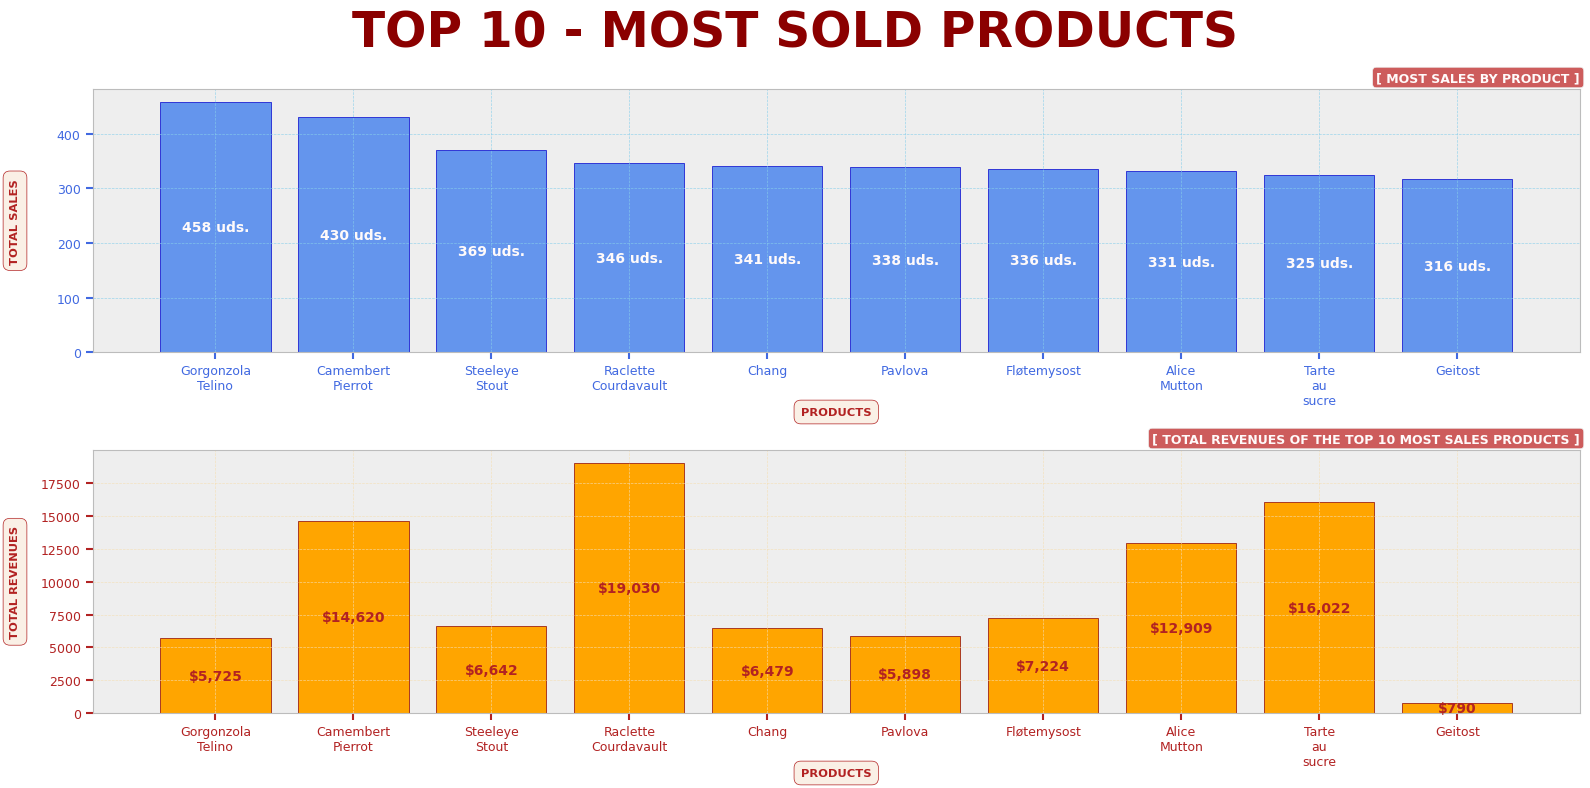

In [26]:
topSoldProduct = conn_db(   query = ''' 
                                        SELECT  p.ProductName, p.Unit, p.Price, 
                                                SUM( od.Quantity ) 
                                                    AS TotalSoldProducts,
                                                ROUND( SUM( od.Quantity ) * p.Price, 2 ) 
                                                    AS TotalRevenues
                                            
                                        FROM [Products] p
                                        JOIN [OrderDetails] od ON p.ProductID = od.ProductID
                                            
                                        GROUP BY ProductName
                                        ORDER BY TotalSoldProducts DESC 
                                        LIMIT 10 
                                    ''',
                                  
                            columns = [ 'PRODUCT', 'UNIT CONTENT', 'PRICE', 'TOTAL SALES', 'TOTAL REVENUES' ]   ) 

print("\n==[ MOST SOLD PRODUCTS (TOP 10) ]==")
print( tabulate( topSoldProduct, headers = "keys", tablefmt= "pretty" ) )


# GRÁFICA MATPLOTLIB
#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
products    = topSoldProduct[ "PRODUCT" ].apply( lambda x: x.replace(" ", "\n") )
sales       = topSoldProduct[ "TOTAL SALES" ]
revenues    = topSoldProduct[ "TOTAL REVENUES" ]
#¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨
plt.style.use( "bmh" )

fig, ax = plt.subplots( nrows = 2, ncols = 1, 
                        figsize = ( 16, 8 ) )
fig.align_labels()                                                 

plt.suptitle( "TOP 10 - MOST SOLD PRODUCTS", 
              fontsize = 35, color = "darkred", fontweight = "bold" )
#¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨
# PLOT 1
#¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨
plt.subplot( 211 )
plt.title( "[ MOST SALES BY PRODUCT ]", 
           color = "snow", fontweight = "bold", fontsize = 9, 
           loc = "right", bbox={ 'facecolor':'indianred', 
                                 'boxstyle': 'round, pad=0.30' } )

bar_sales = plt.bar( x = products, height = sales, 
                          edgecolor = "mediumblue", 
                          color = "cornflowerblue" )

plt.bar_label( bar_sales, fmt = "{:,.0f} uds.", label_type = "center",
               fontweight = "bold", color = "snow" )

plt.xlabel( "PRODUCTS", 
            labelpad = 0, fontsize = 8.25, color = "firebrick", 
            fontweight = "bold", bbox = { 'boxstyle': 'round', 
                                          'facecolor': 'linen',
                                          'edgecolor': 'firebrick', 
                                          'pad': 0.6 } )
plt.ylabel( "TOTAL SALES", 
            labelpad = 15, fontsize = 8.25, color = "firebrick", 
            fontweight = "bold", bbox = { 'boxstyle': 'round', 
                                          'facecolor': 'linen',
                                          'edgecolor': 'firebrick', 
                                          'pad': 0.6 } )

plt.tick_params( direction = "out", length = 5, width = 1.5, 
                 colors = "royalblue", labelsize = 9, 
                 grid_color = "skyblue", grid_alpha = 0.8 )
#¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨
# PLOT 2
#¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨
plt.subplot( 212 )
plt.title( "[ TOTAL REVENUES OF THE TOP 10 MOST SALES PRODUCTS ]", 
           color = "snow", fontweight = "bold", fontsize = 9,
           loc = "right", bbox={ 'facecolor':'indianred', 
                                 'boxstyle': 'round, pad=0.30' } )

bar_revenues = plt.bar( x = products, height = revenues, 
                          edgecolor = "darkred", 
                          color = "orange" )

plt.bar_label( bar_revenues, fmt = "${:,.0f}", label_type = "center",
               fontweight = "bold", color = "firebrick" )

plt.xlabel( "PRODUCTS", 
            labelpad = 0, fontsize = 8.25, color = "firebrick",
            fontweight = "bold", bbox = { 'boxstyle': 'round', 
                                          'facecolor': 'linen',
                                          'edgecolor': 'firebrick', 
                                          'pad': 0.6 } )
plt.ylabel( "TOTAL REVENUES", 
            labelpad = 15, fontsize = 8.25, color = "firebrick", 
            fontweight = "bold", bbox = { 'boxstyle': 'round', 
                                          'facecolor': 'linen',
                                          'edgecolor': 'firebrick', 
                                          'pad': 0.6 } )

plt.tick_params( direction = "out", length = 5, width = 1.5, 
                 colors = "firebrick", labelsize = 9, 
                 grid_color = "wheat", grid_alpha = 0.8 )
#¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨
plt.tight_layout()
plt.show()
#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

¨
## <font color="lightgreen" size=5>**> 02. MOST USED SUPPLIERS**</font>


==[ MOST USED SUPPLIERS ]==
+----+----------------------------------------+---------------+-------------+----------+
|    |                SUPPLIER                |     CITY      |   COUNTRY   | PRODUCTS |
+----+----------------------------------------+---------------+-------------+----------+
| 0  |       Refrescos Americanas LTDA        |   São Paulo   |   Brazil    |    1     |
| 1  | Nord-Ost-Fisch Handelsgesellschaft mbH |   Cuxhaven    |   Germany   |    1     |
| 2  |           Escargots Nouveaux           |   Montceau    |   France    |    1     |
| 3  |   Cooperativa de Quesos 'Las Cabras'   |    Oviedo     |    Spain    |    2     |
| 4  |            PB Knäckebröd AB            |   Göteborg    |   Sweden    |    2     |
| 5  |       Aux joyeux ecclésiastiques       |     Paris     |   France    |    2     |
| 6  |      New England Seafood Cannery       |    Boston     |     USA     |    2     |
| 7  |               Lyngbysild               |    Lyngby     |   Denmark   |    

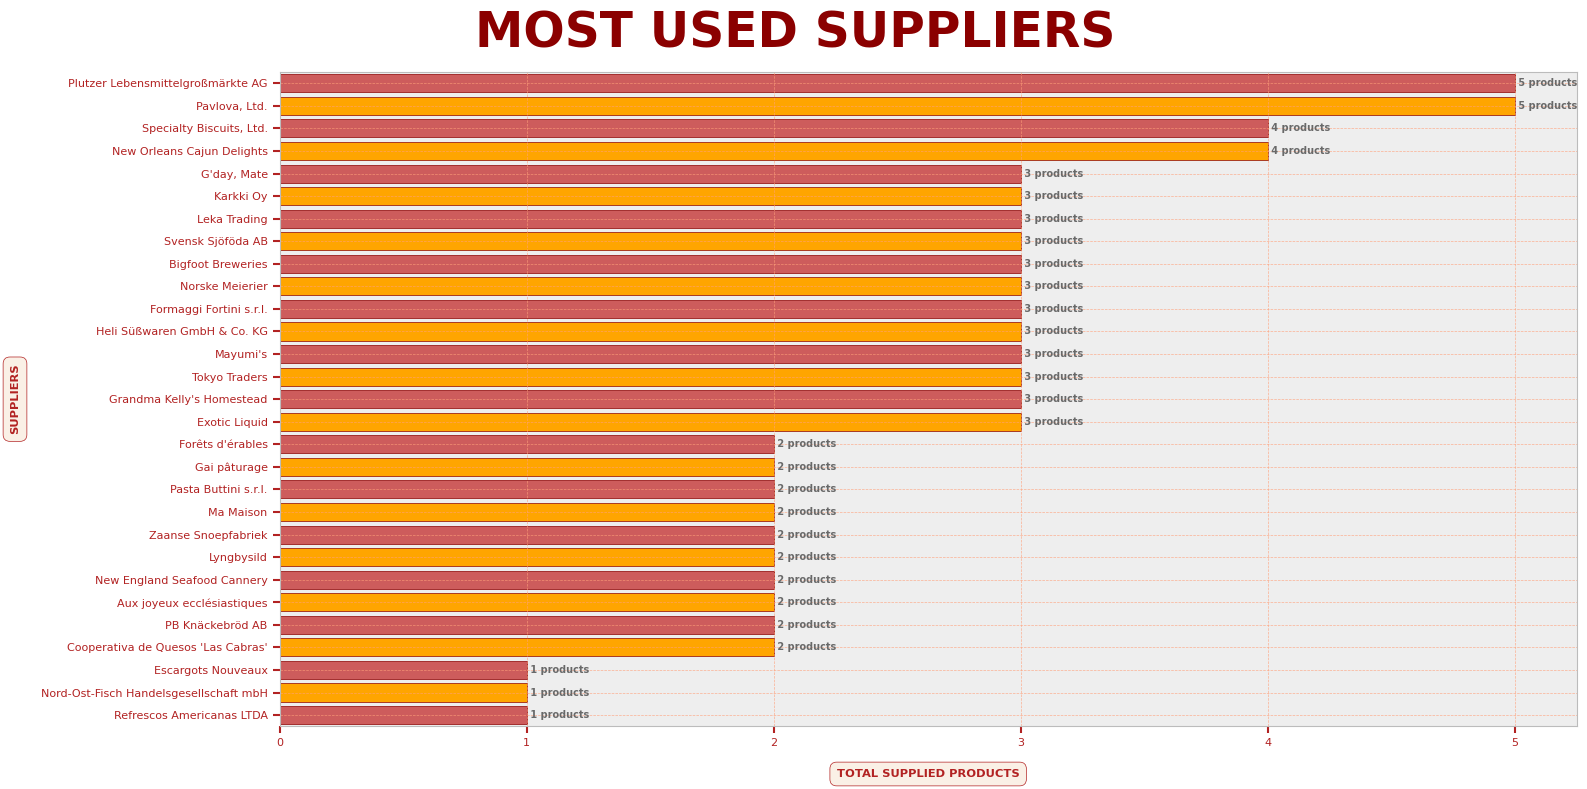

In [27]:
topUsedSuppliers = conn_db( query = '''
                                        SELECT  s.SupplierName, s.City, s.Country, 
                                                COUNT(s.SupplierID) 
                                                    AS SuppliedProducts
                                        
                                        FROM [Suppliers] s
                                        JOIN [Products] p 
                                            ON s.SupplierID = p.SupplierID
                                
                                        GROUP BY s.SupplierID
                                        ORDER BY SuppliedProducts ASC
                                    ''',

                            columns = [ 'SUPPLIER', 'CITY', 'COUNTRY', 'PRODUCTS' ] )

print("\n==[ MOST USED SUPPLIERS ]==")
print( tabulate( topUsedSuppliers, headers = "keys", tablefmt= "pretty" ) )


# GRÁFICA MATPLOTLIB
#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
supplier = topUsedSuppliers[ "SUPPLIER" ]
products = topUsedSuppliers[ "PRODUCTS" ]
#¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨
plt.style.use( "bmh" )


topUsedSuppliers.plot( x = "SUPPLIER", y = "PRODUCTS", kind = "barh",
                       figsize = ( 16, 8 ), legend = False )

plt.suptitle( "MOST USED SUPPLIERS", 
              fontsize = 35, color = "darkred", fontweight = "bold" )
#¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨
barh_container = plt.barh( y = supplier, width = products,
                           color = ["indianred", "orange"], 
                           edgecolor = "darkred" )

plt.bar_label( barh_container, fmt = " {:,.0f} products", label_type = "edge",
               fontweight = "semibold", fontsize = 7, color = "dimgray" )
#¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨
plt.xlabel( "TOTAL SUPPLIED PRODUCTS", 
            labelpad = 15, fontsize = 8.25, color = "firebrick", 
            fontweight = "bold", bbox = { 'boxstyle': 'round', 
                                          'facecolor': 'linen',
                                          'edgecolor': 'firebrick', 
                                          'pad': 0.6 } )
plt.ylabel( "SUPPLIERS", 
            labelpad = 15, fontsize = 8.25, color = "firebrick", 
            fontweight = "bold", bbox = { 'boxstyle': 'round', 
                                          'facecolor': 'linen',
                                          'edgecolor': 'firebrick', 
                                          'pad': 0.6 } )

plt.tick_params( direction = "out", length = 5, width = 1.5, 
                 colors = "firebrick", labelsize = 8, 
                 grid_color = "lightsalmon", grid_alpha = 0.8 )
#¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨
plt.tight_layout()
plt.get_current_fig_manager()
plt.show()
#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

¨
## <font color="lightgreen" size=5>**> 03. MOST PROFITABLE SUPPLIER ACCORDING TO LOCATION**</font>

+----+----------------+----------------------------------------+---------------+-------------+----------+
|    |    LOCATION    |                SUPPLIER                |     CITY      |   COUNTRY   | REVENUES |
+----+----------------+----------------------------------------+---------------+-------------+----------+
| 0  |    America     |            Forêts d'érables            | Ste-Hyacinthe |   Canada    | 19043.5  |
| 1  |    America     |       New Orleans Cajun Delights       |  New Orleans  |     USA     | 10321.9  |
| 2  |    America     |           Bigfoot Breweries            |     Bend      |     USA     |  8252.0  |
| 3  |    America     |               Ma Maison                |   Montréal    |   Canada    |  7798.0  |
| 4  |    America     |       Grandma Kelly's Homestead        |   Ann Arbor   |     USA     |  7250.0  |
| 5  |    America     |      New England Seafood Cannery       |    Boston     |     USA     | 6051.75  |
| 6  |    America     |       Refrescos Americ

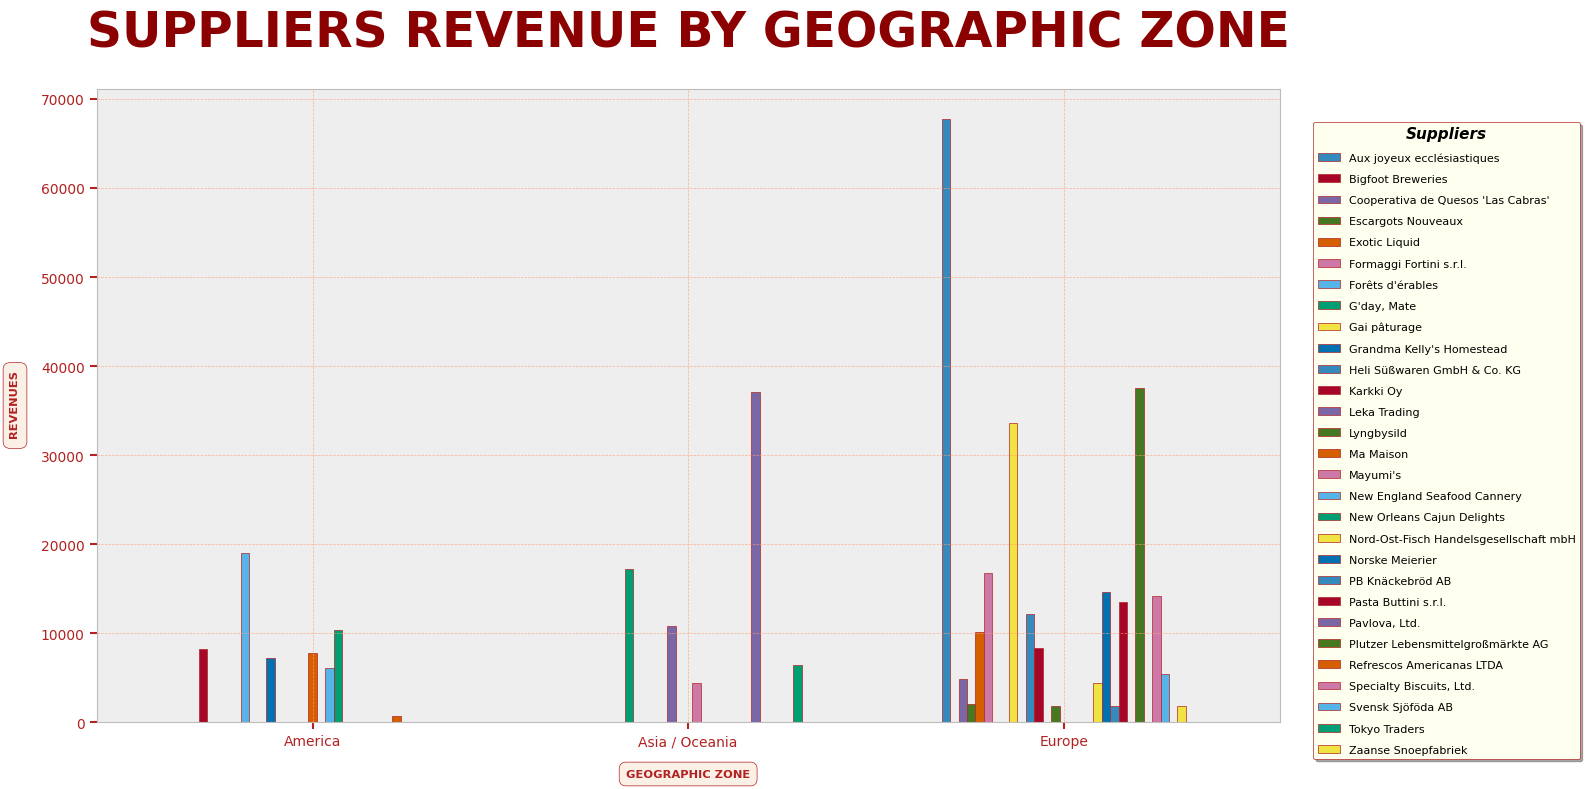

In [28]:
mostProfitSupplier = conn_db(        
                        query = '''
                                SELECT  
                                        CASE
                                            WHEN Country IN ( 'USA', 'Brazil', 'Canada' ) 
                                                THEN 'America'
                                            WHEN Country IN ( 'UK', 'Spain', 'Sweden', 'Germany', 'Italy', 'Norway', 
                                                              'France', 'Denmark', 'Netherlands', 'Finland' ) 
                                                THEN 'Europe'
                                            WHEN Country IN ( 'Japan', 'Australia', 'Singapore' ) 
                                                THEN 'Asia / Oceania'
                                        END AS Location,
                                        
                                        SupplierName, s.City, s.Country,
                                        ROUND( SUM( Price * Quantity ), 2 ) 
                                            AS Revenues
                                        
                                FROM [OrderDetails] od
                                JOIN [Products] p 
                                        ON od.ProductID = p.ProductID
                                JOIN [Suppliers] s 
                                        ON p.SupplierID = s.SupplierID 
                                
                                GROUP BY Location, s.SupplierID
                                ORDER BY Location, Revenues DESC        
                                ''',
                                      
                        columns = [ 'LOCATION', 'SUPPLIER', 'CITY', 'COUNTRY', 'REVENUES' ]    )

print( tabulate( mostProfitSupplier, headers = "keys", tablefmt= "pretty" ) )



# GRÁFICA MATPLOTLIB (pivot_table)
#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
plt.style.use( "bmh" )

p_table = mostProfitSupplier.pivot_table( index = "LOCATION", columns = "SUPPLIER", values = "REVENUES", 
                                          aggfunc = "sum", fill_value = None )
p_table.plot( kind = "bar", figsize = ( 16, 8 ), edgecolor = "firebrick", width = 0.65 )

plt.title( "SUPPLIERS REVENUE BY GEOGRAPHIC ZONE", 
           fontsize = 35, color = "darkred", fontweight = "bold", pad = 30 )
plt.xlabel( "GEOGRAPHIC ZONE", 
            labelpad = 15, fontsize = 8.25, color = "firebrick",
            fontweight = "bold", bbox = { 'boxstyle': 'round', 
                                          'facecolor': 'linen',
                                          'edgecolor': 'firebrick', 
                                          'pad': 0.6 } )
plt.ylabel( " REVENUES", 
            labelpad = 15, fontsize = 8.25, color = "firebrick", 
            fontweight = "bold", bbox = { 'boxstyle': 'round', 
                                          'facecolor': 'linen',
                                          'edgecolor': 'firebrick', 
                                          'pad': 0.6 } )
plt.tick_params( direction = "out", length = 5, width = 1.5, 
                 rotation = 0, colors = "firebrick", labelsize = 10,
                 grid_color = "lightsalmon", grid_alpha = 0.8  )

plt.legend( title = "Suppliers", loc = "upper left", bbox_to_anchor = ( 1, 1 ), 
            facecolor= "ivory", edgecolor = "firebrick", shadow = True, 
            fontsize = 8, labelspacing = 1.0, borderaxespad = 3.0,
            title_fontproperties = { 'weight': 'bold', 'size': 11, 
                                     'style': 'italic' } )

plt.tight_layout()
plt.show()
#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

¨
## <font color="lightgreen" size=5>**> 04. MOST EMPLOYEE SALES FOR EACH CATEGORY**</font>


==[ MOST SALES OF THE EMPLOYEES FOR EACH CATEGORY ]==
+----+--------------+----------------+-------+
|    |   EMPLOYEE   |    CATEGORY    | SALES |
+----+--------------+----------------+-------+
| 0  |  M. Peacock  |   Beverages    |  595  |
| 1  |  M. Peacock  |  Confections   |  572  |
| 2  |  M. Peacock  | Dairy Products |  546  |
| 3  |  N. Davolio  | Dairy Products |  505  |
| 4  | S. Buchanan  | Dairy Products |  455  |
| 5  |  M. Peacock  |   Condiments   |  398  |
| 6  |  M. Suyama   | Dairy Products |  381  |
| 7  | J. Leverling |  Confections   |  369  |
| 8  |  N. Davolio  |   Beverages    |  357  |
| 9  |  M. Peacock  |    Seafood     |  355  |
| 10 |  M. Peacock  |  Meat/Poultry  |  336  |
| 11 |  A. Fuller   |  Meat/Poultry  |  300  |
| 12 | J. Leverling | Dairy Products |  293  |
| 13 |  N. Davolio  |  Confections   |  286  |
| 14 | L. Callahan  |  Confections   |  284  |
| 15 |  N. Davolio  |    Seafood     |  268  |
| 16 |   R. King    |   Beverages    |  247  |
| 17 

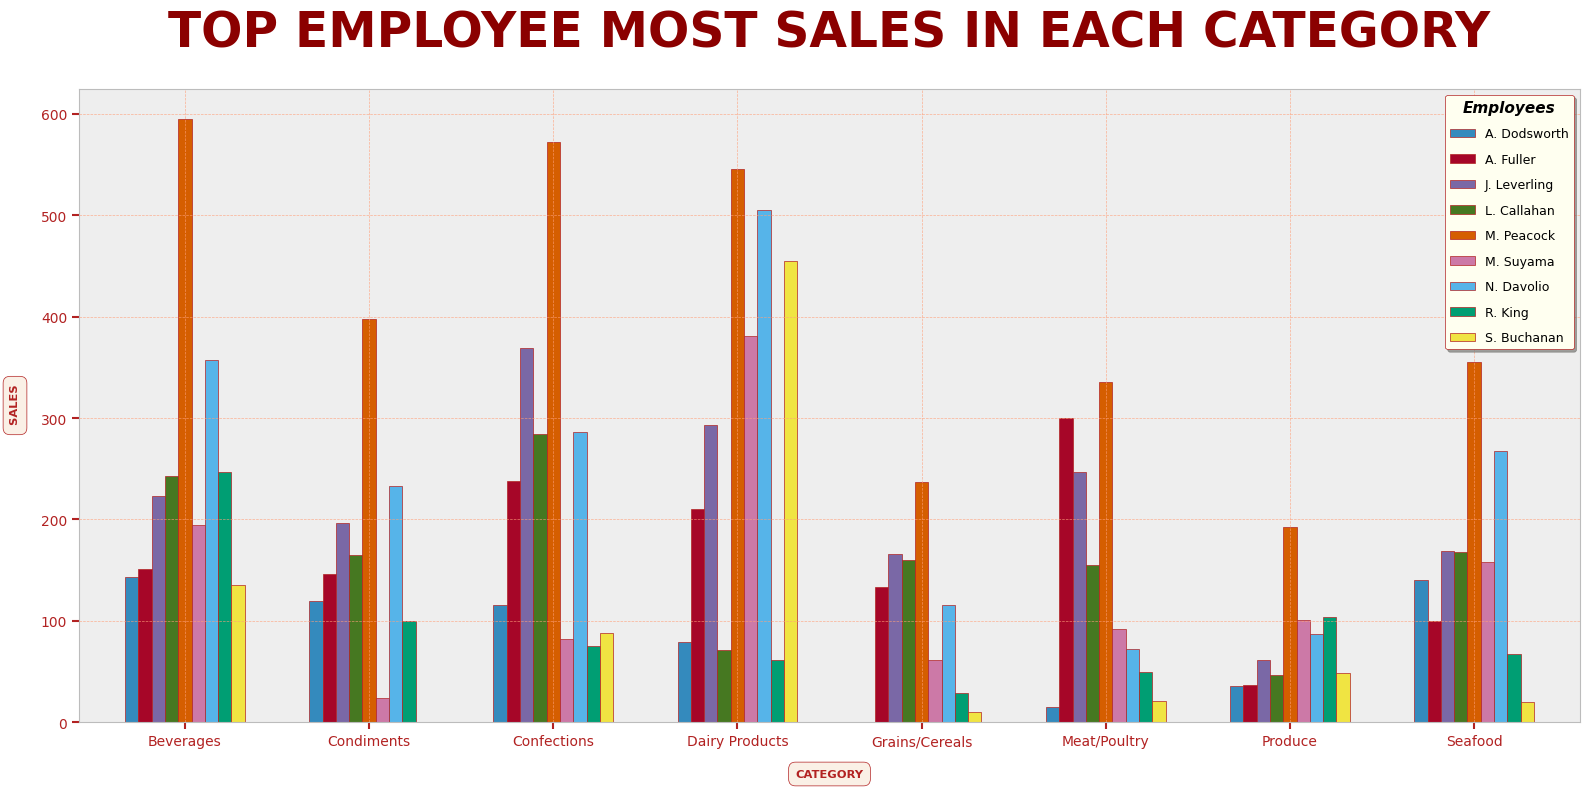

In [29]:
empSalesForCat = conn_db( query = '''
                                        SELECT  SUBSTR( e.FirstName, 1, 1 ) || ". " || e.LastName AS Employee,
                                        		c.CategoryName,
                                        		SUM(od.Quantity) AS SalesEmployee
                                          
                                        FROM [Employees] e
                                        JOIN [Orders] o ON o.EmployeeID = e.EmployeeID
                                        JOIN [OrderDetails] od ON od.OrderID = o.OrderID
                                        JOIN [Products] p ON p.ProductID = od.ProductID
                                        JOIN [Categories] c	ON c.CategoryID = p.CategoryID
                                        
                                        GROUP BY c.CategoryName, Employee
                                        ORDER BY SalesEmployee DESC
                                  ''',
                                  
                          columns = [ 'EMPLOYEE', 'CATEGORY', 'SALES' ] )

print("\n==[ MOST SALES OF THE EMPLOYEES FOR EACH CATEGORY ]==")
print( tabulate( empSalesForCat, headers = "keys", tablefmt= "pretty" ) )


# GRÁFICA MATPLOTLIB
#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
plt.style.use( "bmh" )

p_table = empSalesForCat.pivot_table( index = "CATEGORY", columns = "EMPLOYEE", values = "SALES", 
                                      aggfunc = "sum", fill_value = None )
p_table.plot( kind = "bar", figsize = ( 16, 8 ), edgecolor = "firebrick", width = 0.65 )

plt.title( "TOP EMPLOYEE MOST SALES IN EACH CATEGORY", 
           fontsize = 35, color = "darkred", fontweight = "bold", pad = 30 )
plt.xlabel( "CATEGORY", 
            labelpad = 15, fontsize = 8.25, color = "firebrick",
            fontweight = "bold", bbox = { 'boxstyle': 'round', 
                                          'facecolor': 'linen',
                                          'edgecolor': 'firebrick', 
                                          'pad': 0.6 } )
plt.ylabel( " SALES", 
            labelpad = 15, fontsize = 8.25, color = "firebrick", 
            fontweight = "bold", bbox = { 'boxstyle': 'round', 
                                          'facecolor': 'linen',
                                          'edgecolor': 'firebrick', 
                                          'pad': 0.6 } )

plt.tick_params( direction = "out", length = 5, width = 1.5, 
                 rotation = 0, colors = "firebrick", labelsize = 10,
                 grid_color = "lightsalmon", grid_alpha = 0.8  )

plt.legend( title = "Employees", loc = "best", bbox_to_anchor = ( 1, 1 ), 
            facecolor= "ivory", edgecolor = "firebrick", shadow = True, 
            fontsize = 9, labelspacing = 1.0, borderaxespad = 0.5,
            title_fontproperties = { 'weight': 'bold', 'size': 11, 
                                     'style': 'italic' } )

plt.tight_layout()
plt.show()
#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

¨
## <font color="lightgreen" size=5>**> 05. LESS PROFITABLE CATEGORY**</font>


==[ MOST SALES OF THE EMPLOYEES FOR EACH CATEGORY ]==
+----+----------------+----------------------------------+--------+--------+-------+----------+---------------+
|    |    CATEGORY    |             PRODUCT              | PRICE  |  COST  | SALES | REVENUES | PROFITABILITY |
+----+----------------+----------------------------------+--------+--------+-------+----------+---------------+
| 0  |   Beverages    |       Rhönbräu Klosterbier       |  7.75  |  2.56  |  144  |  1116.0  |     66.97     |
| 1  |   Beverages    |        Guaraná Fantástica        |  4.5   |  1.88  |  158  |  711.0   |     58.22     |
| 2  |   Beverages    |    Laughing Lumberjack Lager     |  14.0  |  7.77  |   5   |   70.0   |     44.5      |
| 3  |   Beverages    |          Sasquatch Ale           |  14.0  |  8.54  |  110  |  1540.0  |     39.0      |
| 4  |   Beverages    |           Lakkalikööri           |  18.0  | 11.51  |  198  |  3564.0  |     36.06     |
| 5  |   Beverages    |              Chais       

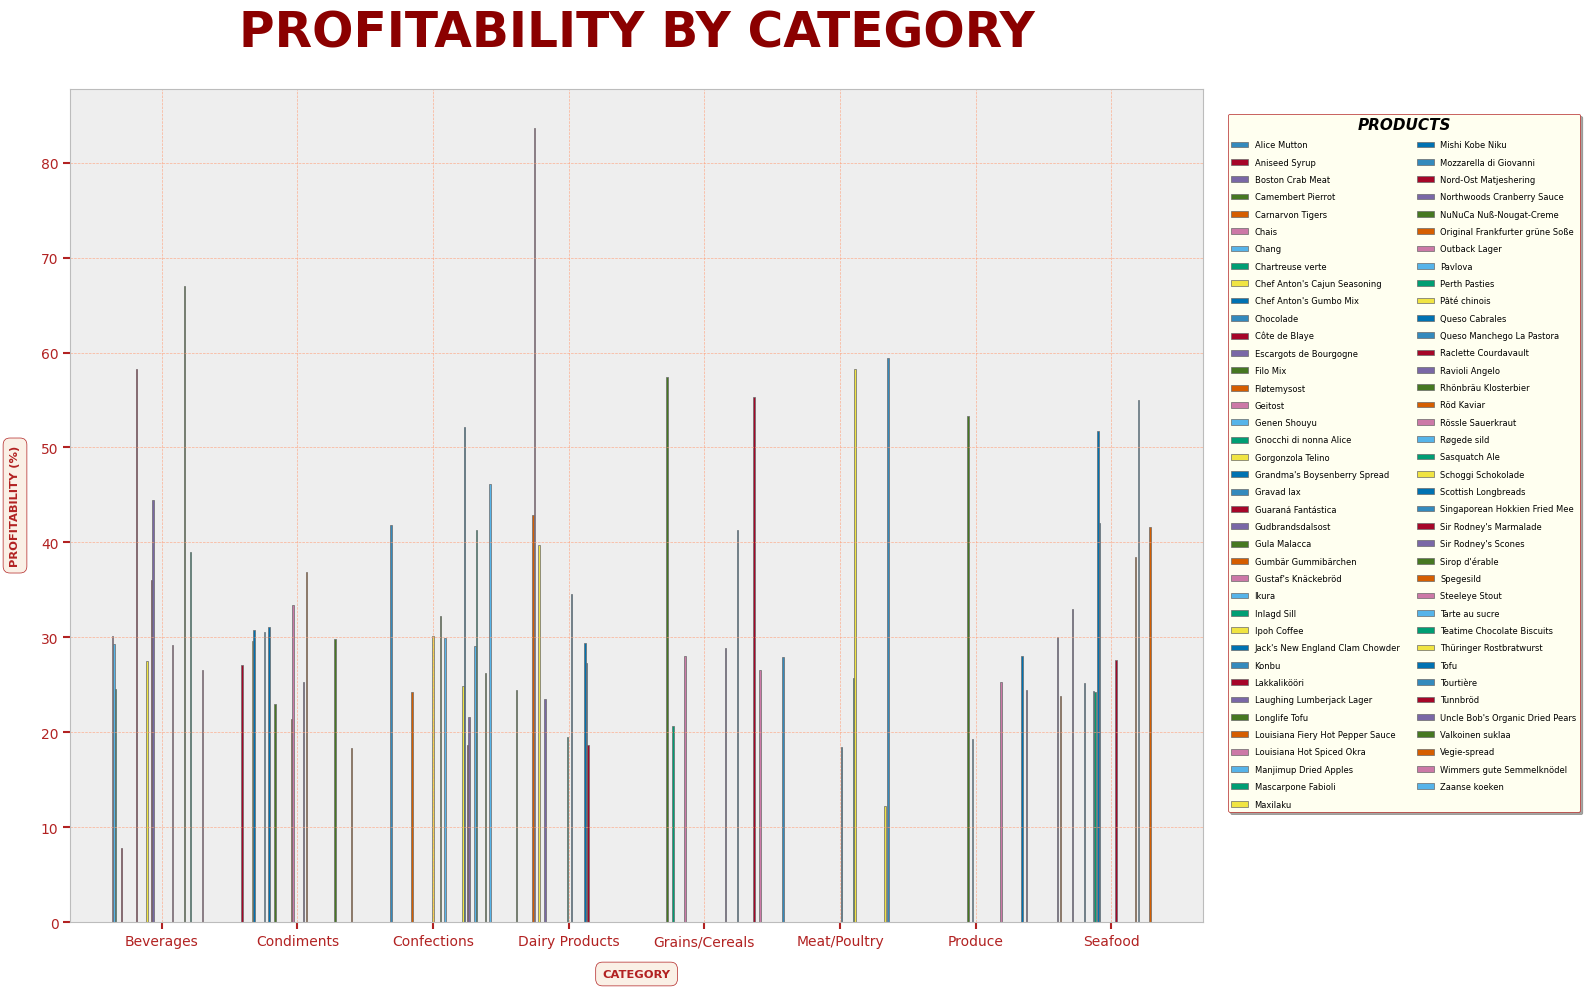

In [30]:
lessProfitCat = conn_db( query = '''
                                    SELECT  c.CategoryName,
                                    		p.ProductName,
                                    		Price, Cost,
                                    		SUM( od.Quantity ) AS Sales,
                                    		ROUND( SUM( od.Quantity )* Price ) AS Revenues,
                                    		ROUND( ( Price - Cost ) / Price * 100, 2 ) AS Profitability
                                          
                                    FROM [OrderDetails] od
                                    JOIN [Products] p 
                                        ON od.ProductID = p.ProductID
                                    JOIN [Categories] c 
                                        ON p.CategoryID = c.CategoryID 
                                        
                                    GROUP BY c.CategoryName, Profitability
                                    ORDER BY c.CategoryName, Profitability DESC
                                  ''',
                                  
                          columns = [ 'CATEGORY', 'PRODUCT', 'PRICE', 'COST', 'SALES', 'REVENUES', 'PROFITABILITY' ] )

print("\n==[ MOST SALES OF THE EMPLOYEES FOR EACH CATEGORY ]==")
print( tabulate( lessProfitCat, headers = "keys", tablefmt= "pretty" ) )


# GRÁFICA MATPLOTLIB
#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
plt.style.use( "bmh" )

p_table = lessProfitCat.pivot_table( index = "CATEGORY", columns = "PRODUCT", values = "PROFITABILITY", 
                                     aggfunc = "sum", fill_value = None )
p_table.plot( kind = "bar", figsize = ( 16, 10 ), edgecolor = "dimgray", width = 0.85 )

plt.title( "PROFITABILITY BY CATEGORY", 
           fontsize = 35, color = "darkred", fontweight = "bold", pad = 30 )
plt.xlabel( "CATEGORY", 
            labelpad = 15, fontsize = 8.25, color = "firebrick",
            fontweight = "bold", bbox = { 'boxstyle': 'round', 
                                          'facecolor': 'linen',
                                          'edgecolor': 'firebrick', 
                                          'pad': 0.6 } )
plt.ylabel( "PROFITABILITY (%)", 
            labelpad = 15, fontsize = 8.25, color = "firebrick", 
            fontweight = "bold", bbox = { 'boxstyle': 'round', 
                                          'facecolor': 'linen',
                                          'edgecolor': 'firebrick', 
                                          'pad': 0.6 } )

plt.tick_params( direction = "out", length = 5, width = 1.5, 
                 rotation = 0, colors = "firebrick", labelsize = 10,
                 grid_color = "lightsalmon", grid_alpha = 0.8  )

plt.legend( title = "PRODUCTS", loc = "upper left", bbox_to_anchor = ( 1, 1 ), 
            facecolor= "ivory", edgecolor = "firebrick", shadow = True, ncol = 2,
            fontsize = 6, labelspacing = 1.0, borderaxespad = 3.0,
            title_fontproperties = { 'weight': 'bold', 'size': 11, 
                                     'style': 'italic' } )

plt.tight_layout()
plt.show()
#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

¨
## <font color="lightgreen" size=5>**> 06. MOST PROFITABLE PRODUCTS**</font>


==[ MOST PROFITABLE PRODUCTS ]==
+---+----------------------+-------+-------+-------+----------+---------------+
|   |       PRODUCT        | PRICE | COST  | SALES | REVENUES | PROFITABILITY |
+---+----------------------+-------+-------+-------+----------+---------------+
| 0 |       Geitost        |  2.5  | 0.41  |  316  |  790.0   |     83.6      |
| 1 | Rhönbräu Klosterbier | 7.75  | 2.56  |  144  |  1116.0  |     66.97     |
| 2 |      Tourtière       | 7.45  | 3.02  |  280  |  2086.0  |     59.46     |
| 3 |     Pâté chinois     | 24.0  | 10.02 |  238  |  5712.0  |     58.25     |
| 4 |  Guaraná Fantástica  |  4.5  | 1.88  |  158  |  711.0   |     58.22     |
| 5 |       Filo Mix       |  7.0  | 2.98  |  48   |  336.0   |     57.43     |
| 6 |       Tunnbröd       |  9.0  | 4.02  |  165  |  1485.0  |     55.33     |
| 7 |     Røgede sild      |  9.5  | 4.28  |  15   |  143.0   |     54.95     |
| 8 |    Longlife Tofu     | 10.0  | 4.67  |  186  |  1860.0  |     53.3      |
| 9 | 

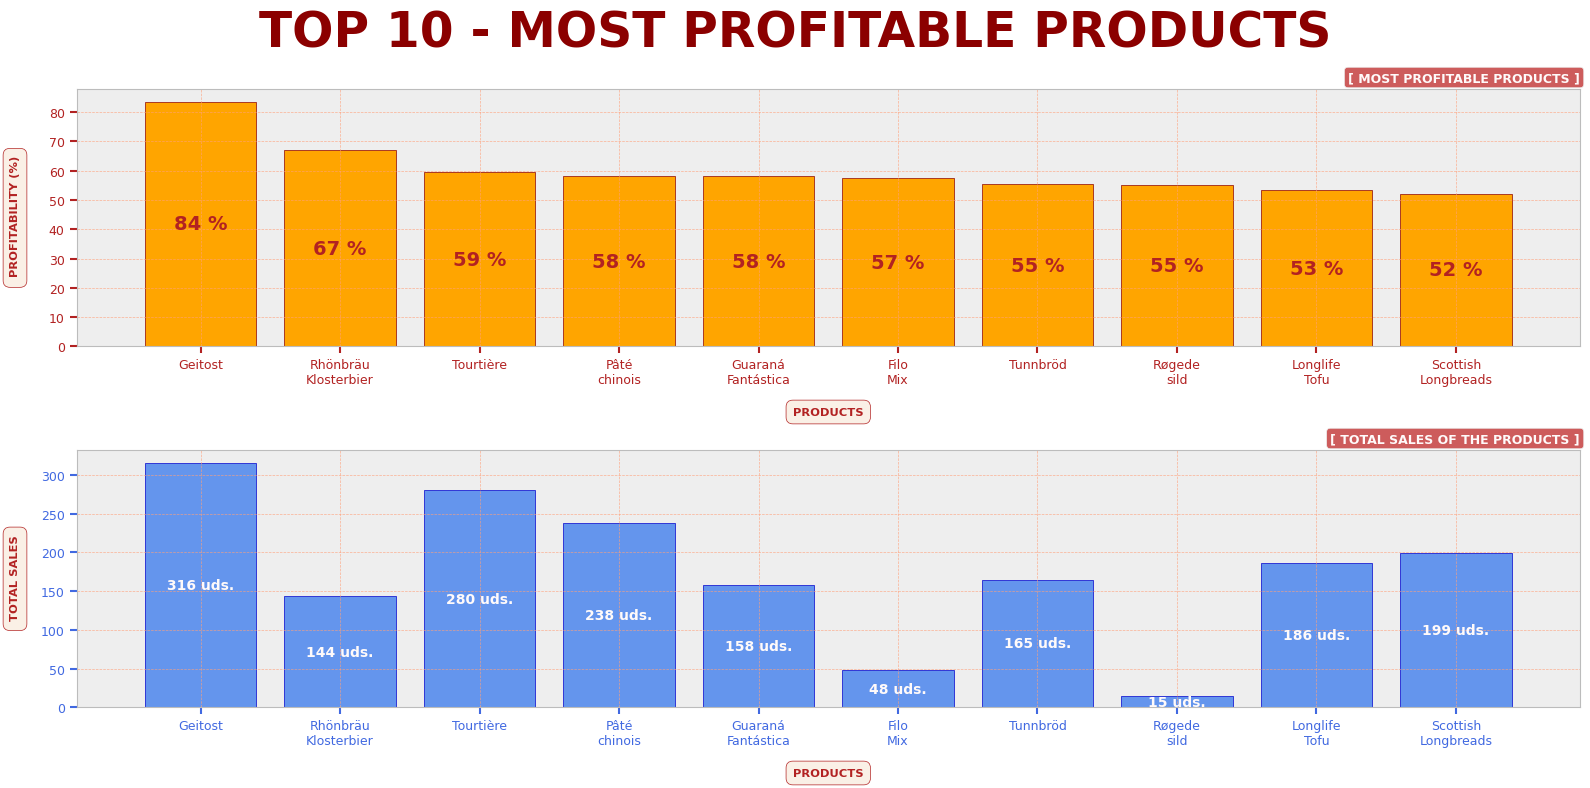

In [32]:
mostProfitableProd = conn_db( query = '''
                                        SELECT  p.ProductName,
                                        		Price, Cost,
                                        		SUM( od.Quantity ) AS Sales,
                                        		ROUND( SUM( od.Quantity )* Price ) AS Revenues,
                                        		ROUND( ( Price - Cost ) / Price * 100, 2 ) AS Profitability

                                        FROM [OrderDetails] od
                                        JOIN [Products] p 
                                            ON od.ProductID = p.ProductID

                                        GROUP BY p.ProductName, Profitability
                                        ORDER BY Profitability DESC
                                        LIMIT 10
                                      ''',
                                  
                              columns = [ 'PRODUCT', 'PRICE', 'COST', 'SALES', 'REVENUES', 'PROFITABILITY' ] )

print("\n==[ MOST PROFITABLE PRODUCTS ]==")
print( tabulate( mostProfitableProd, headers = "keys", tablefmt= "pretty" ) )


# GRÁFICA MATPLOTLIB
#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
products    = mostProfitableProd[ "PRODUCT" ].apply( lambda x: x.replace(" ", "\n") )
sales       = mostProfitableProd[ "SALES" ]
profitab    = mostProfitableProd[ "PROFITABILITY" ]
#¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨
plt.style.use( "bmh" )

fig, ( ax1, ax2 ) = plt.subplots( nrows = 2, ncols = 1, 
                                  figsize = ( 16, 8 ) )

fig.align_labels()

plt.suptitle( "TOP 10 - MOST PROFITABLE PRODUCTS", 
              fontsize = 35, color = "darkred", fontweight = "bold" )
#¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨
# PLOT 1
#¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨
plt.subplot( 211 )
plt.title( "[ MOST PROFITABLE PRODUCTS ]", 
           color = "snow", fontweight = "bold", fontsize = 9, 
           loc = "right", bbox={ 'facecolor':'indianred', 
                                 'boxstyle': 'round, pad=0.30' } )

bar_profitab = plt.bar( x = products, height = profitab, 
                        edgecolor = "darkred", 
                        color = "orange" )

plt.bar_label( bar_profitab, fmt = "{:,.0f} %", label_type = "center",
               fontsize = 14, fontweight = "bold", color = "firebrick" )

plt.xlabel( "PRODUCTS", 
            labelpad = 15, fontsize = 8.25, color = "firebrick", 
            fontweight = "bold", bbox = { 'boxstyle': 'round', 
                                          'facecolor': 'linen',
                                          'edgecolor': 'firebrick', 
                                          'pad': 0.6 } )
plt.ylabel( " PROFITABILITY (%)", 
            labelpad = 15, fontsize = 8.25, color = "firebrick", 
            fontweight = "bold", bbox = { 'boxstyle': 'round', 
                                          'facecolor': 'linen',
                                          'edgecolor': 'firebrick', 
                                          'pad': 0.6 } )

plt.tick_params( direction = "out", length = 5, width = 1.5, 
                 colors = "firebrick", labelsize = 9, rotation = 0, 
                 grid_color = "lightsalmon", grid_alpha = 0.8 )
#¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨
# PLOT 2
#¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨
plt.subplot( 212 )
plt.title( "[ TOTAL SALES OF THE PRODUCTS ]", 
           color = "snow", fontweight = "bold", fontsize = 9, 
           loc = "right", bbox={ 'facecolor':'indianred', 
                                 'boxstyle': 'round, pad=0.30' } )

bar_sales = plt.bar( x = products, height = sales, 
                     edgecolor = "mediumblue", 
                     color = "cornflowerblue" )

plt.bar_label( bar_sales, fmt = "{:,.0f} uds.", label_type = "center",
               fontweight = "bold", color = "snow" )

plt.xlabel( "PRODUCTS", 
            labelpad = 15, fontsize = 8.25, color = "firebrick", 
            fontweight = "bold", bbox = { 'boxstyle': 'round', 
                                          'facecolor': 'linen',
                                          'edgecolor': 'firebrick', 
                                          'pad': 0.6 }  )
plt.ylabel( " TOTAL SALES", 
            labelpad = 15, fontsize = 8.25, color = "firebrick", 
            fontweight = "bold", bbox = { 'boxstyle': 'round', 
                                          'facecolor': 'linen',
                                          'edgecolor': 'firebrick', 
                                          'pad': 0.6 } )

plt.tick_params( direction = "out", length = 5, width = 1.5, 
                 colors = "royalblue", labelsize = 9, rotation = 0, 
                 grid_color = "lightsalmon", grid_alpha = 0.8 )

plt.tight_layout()
plt.show()
#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

¨
## <font color="lightgreen" size=5>**> 07. MONTHLY & YEAR SOLD PRODUCTS**</font>


==[ MONTH SALES & YEAR SALES BY PRODUCTS ]==
+-----+------+---------+----------------------------------+-------------+
|     | YEAR |  MONTH  |             PRODUCT              | TOTAL SALES |
+-----+------+---------+----------------------------------+-------------+
|  0  | 1996 | 1996-07 |      Mozzarella di Giovanni      |     29      |
|  1  | 1996 | 1996-07 |          Queso Cabrales          |     12      |
|  2  | 1996 | 1996-07 |  Singaporean Hokkien Fried Mee   |     10      |
|  3  | 1996 | 1996-07 |      Manjimup Dried Apples       |     75      |
|  4  | 1996 | 1996-07 |               Tofu               |      9      |
|  5  | 1996 | 1996-07 |       Gustaf's Knäckebröd        |      6      |
|  6  | 1996 | 1996-07 | Jack's New England Clam Chowder  |     51      |
|  7  | 1996 | 1996-07 | Louisiana Fiery Hot Pepper Sauce |     35      |
|  8  | 1996 | 1996-07 |          Ravioli Angelo          |     65      |
|  9  | 1996 | 1996-07 |        Camembert Pierrot         |     40

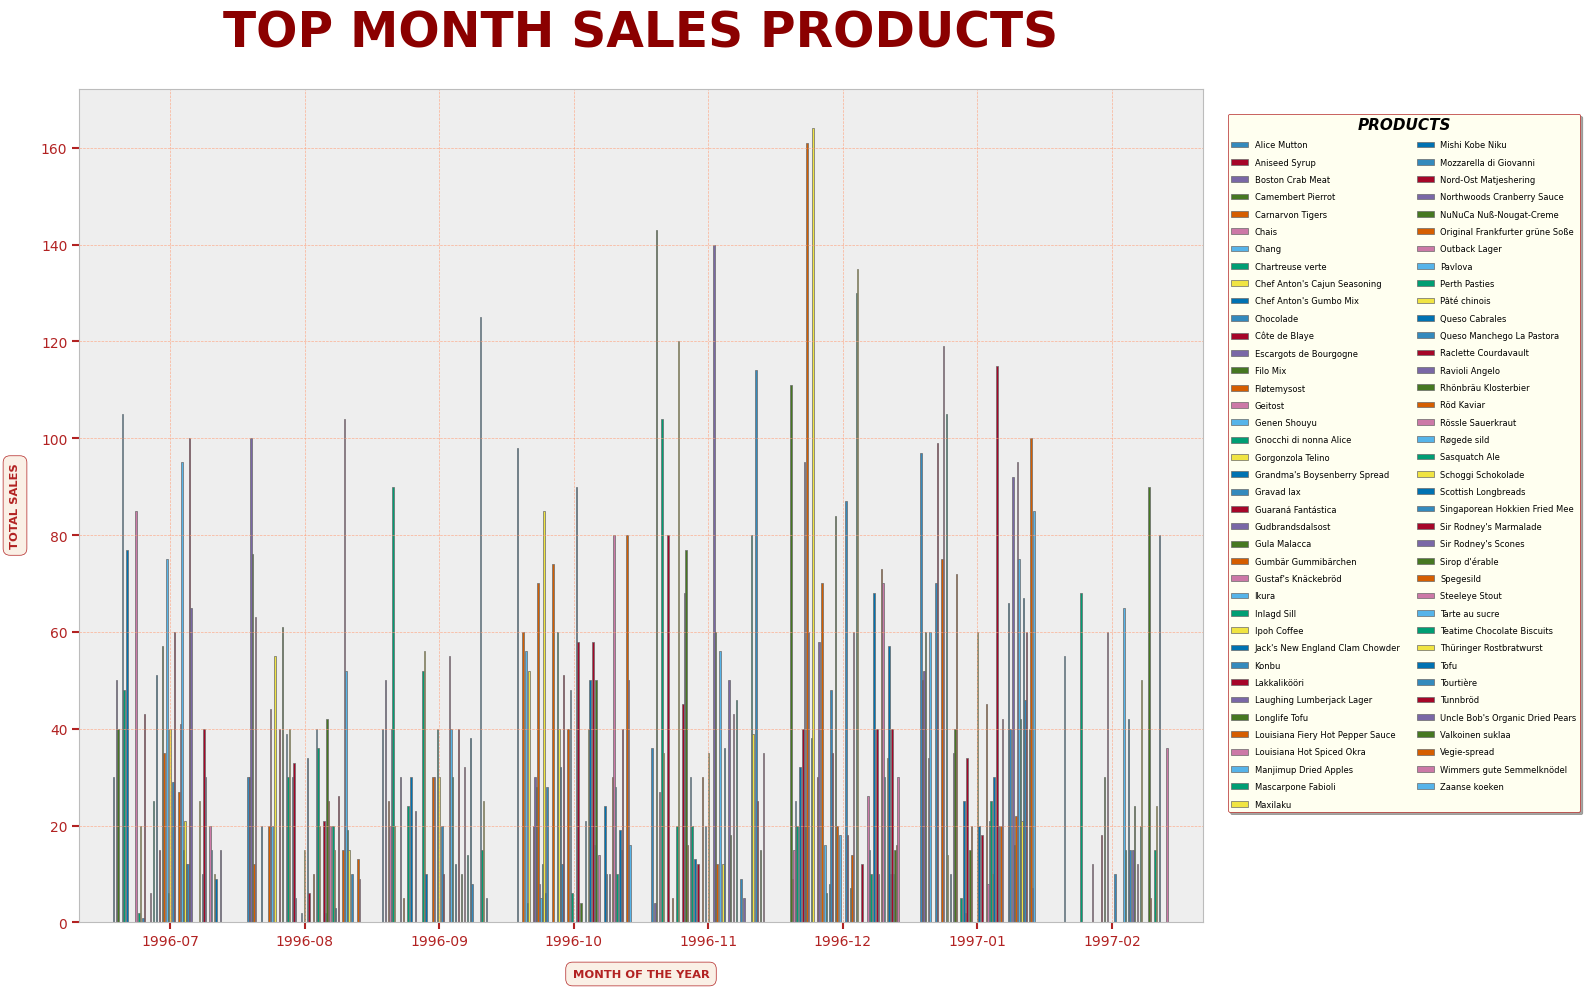

In [33]:
prodSalesMmYy = conn_db( query = '''
                                    SELECT	STRFTIME( "%Y", o.OrderDate ) AS Year,
											STRFTIME( "%Y-%m", o.OrderDate ) AS Month,
		                                    p.ProductName, 
                                      		SUM(od.Quantity) AS ProductSales
                                      		
                                    FROM [Products] p
                                    JOIN [Orders] o ON od.OrderID = O.OrderID
                                    JOIN [OrderDetails] od ON p.ProductID = od.ProductID
                                    
                                    GROUP BY Month, p.ProductName
                                    ORDER BY OrderDate
                                 ''',
                                 
                         columns = [ 'YEAR', 'MONTH', 'PRODUCT', 'TOTAL SALES' ] )

print("\n==[ MONTH SALES & YEAR SALES BY PRODUCTS ]==")
print( tabulate( prodSalesMmYy, headers = "keys", tablefmt= "pretty" ) )


# GRÁFICA MATPLOTLIB (pivot_table)
#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
plt.style.use( "bmh" )

p_table_m = prodSalesMmYy.pivot_table( index = "MONTH", columns = "PRODUCT", values = "TOTAL SALES", 
                          			   aggfunc = "sum", fill_value = None )
p_table_m.plot( kind = "bar", figsize = ( 16, 10 ), edgecolor = "dimgray", width = 0.85 )

plt.title( "TOP MONTH SALES PRODUCTS", 
           fontsize = 35, color = "darkred", fontweight = "bold", pad = 30 )

plt.xlabel( "MONTH OF THE YEAR", 
            labelpad = 15, fontsize = 8.25, color = "firebrick",
            fontweight = "bold", bbox = { 'boxstyle': 'round', 
                                          'facecolor': 'linen',
                                          'edgecolor': 'firebrick', 
                                          'pad': 0.6 } )
plt.ylabel( "TOTAL SALES", 
            labelpad = 15, fontsize = 8.25, color = "firebrick", 
            fontweight = "bold", bbox = { 'boxstyle': 'round', 
                                          'facecolor': 'linen',
                                          'edgecolor': 'firebrick', 
                                          'pad': 0.6 } )

plt.tick_params( direction = "out", length = 5, width = 1.5, 
                 rotation = 0, colors = "firebrick", labelsize = 10,
                 grid_color = "lightsalmon", grid_alpha = 0.8  )

plt.legend( title = "PRODUCTS", loc = "upper left", bbox_to_anchor = ( 1, 1 ), 
            facecolor= "ivory", edgecolor = "firebrick", shadow = True, ncol = 2,
            fontsize = 6, labelspacing = 1.0, borderaxespad = 3.0,
            title_fontproperties = { 'weight': 'bold', 'size': 11, 
                                     'style': 'italic' } )

plt.tight_layout()
plt.show()
#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

¨
## <font color="lightgreen" size=5>**> 08. BEST CUSTOMERS**</font>


==[ BEST CUSTOMERS ]==
+---+--------------------+--------------+----------+--------------+
|   |     CUSTOMERS      | TOTAL ORDERS | PURCHASE | AVG PURCHASE |
+---+--------------------+--------------+----------+--------------+
| 0 |   Roland Mendel    |      35      | 26942.0  |    769.0     |
| 1 |    Paula Wilson    |      22      | 12234.0  |    556.0     |
| 2 |  Patricia McKenna  |      21      | 10735.0  |    511.0     |
| 3 |    Horst Kloss     |      20      | 26009.0  |    1300.0    |
| 4 |   Jose Pavarotti   |      16      | 13524.0  |    845.0     |
| 5 |   Peter Franken    |      15      | 10175.0  |    678.0     |
| 6 |   Jean Fresnière   |      14      | 26375.0  |    1884.0    |
| 7 | Frédérique Citeaux |      13      | 14313.0  |    1101.0    |
| 8 |  Carlos González   |      13      |  4278.0  |    329.0     |
| 9 | Art Braunschweiger |      13      |  560.0   |     43.0     |
+---+--------------------+--------------+----------+--------------+



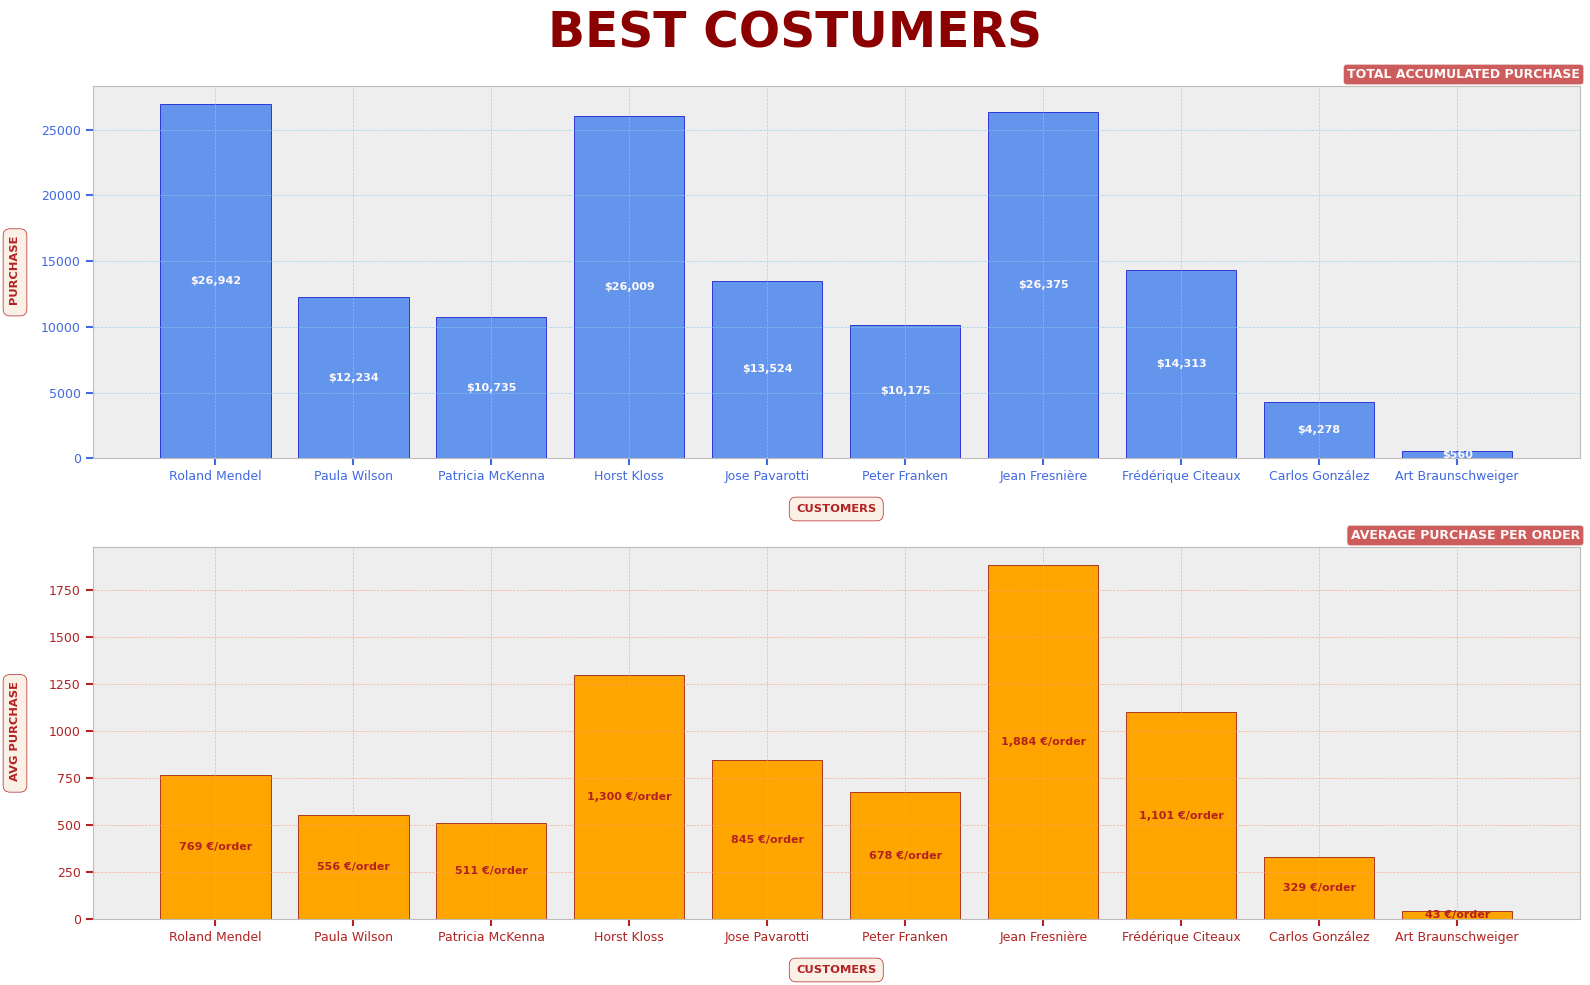

In [34]:
bestCustomers = conn_db( query = '''
                                        SELECT  c.ContactName, 
                                                COUNT( o.OrderID ) AS CustomerOrders,
                                                ROUND( SUM( od.Quantity ) * p.Price ) AS PurchaseExpenditure,
                                                ROUND( SUM( od.Quantity ) * p.Price / COUNT( o.OrderID ) ) AS AvgPurchase
                                        
                                        FROM [Customers] c
                                        JOIN [Orders] o 
                                                ON c.CustomerID = o.CustomerID
                                        JOIN [OrderDetails] od 
                                                ON o.OrderID = od.OrderID
                                        JOIN [Products] p
                                                ON od.ProductID = p.ProductID
                                        
                                        GROUP BY c.ContactName
                                        ORDER BY CustomerOrders DESC, AvgPurchase DESC
                                        LIMIT 10
                                 ''',
                                 
                         columns = [ 'CUSTOMERS', 'TOTAL ORDERS', 'PURCHASE', 'AVG PURCHASE' ] )

print("\n==[ BEST CUSTOMERS ]==")
print( tabulate( bestCustomers, headers = "keys", tablefmt= "pretty" ) )
print()


# GRÁFICA MATPLOTLIB
#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
customers       = bestCustomers[ "CUSTOMERS" ] 
orders          = bestCustomers[ "TOTAL ORDERS" ]
purchase        = bestCustomers[ "PURCHASE" ]
avg_purchase    = bestCustomers[ "AVG PURCHASE" ]
#¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨
plt.style.use( "bmh" )

fig, ax = plt.subplots( nrows = 2, ncols = 1, 
                        figsize = ( 16, 10 ) )

fig.align_labels()

plt.suptitle( "BEST COSTUMERS", 
              fontsize = 35, color = "darkred", fontweight = "bold" )
#¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨
# PLOT 1
#¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨
plt.subplot( 211 )

bar_purchase = plt.bar( x = customers, height = purchase,
                        edgecolor = "mediumblue", color = "cornflowerblue" )

plt.bar_label( bar_purchase, fmt = "${:,.0f}", label_type = "center",
               fontsize = 8, fontweight = "bold", color = "snow" )

plt.title( "TOTAL ACCUMULATED PURCHASE", 
           color = "snow", fontweight = "bold", fontsize = 9, 
           loc = "right", bbox={ 'facecolor':'indianred', 
                                 'boxstyle': 'round, pad=0.30' } )

plt.xlabel( "CUSTOMERS", 
            labelpad = 15, fontsize = 8.25, color = "firebrick", 
            fontweight = "bold", bbox = { 'boxstyle': 'round', 
                                          'facecolor': 'linen',
                                          'edgecolor': 'firebrick', 
                                          'pad': 0.6 } )
plt.ylabel( " PURCHASE", 
            labelpad = 15, fontsize = 8.25, color = "firebrick", 
            fontweight = "bold", bbox = { 'boxstyle': 'round', 
                                          'facecolor': 'linen',
                                          'edgecolor': 'firebrick', 
                                          'pad': 0.6 } )

plt.tick_params( direction = "out", length = 5, width = 1.5, 
                 colors = "royalblue", labelsize = 9, rotation = 0, 
                 grid_color = "skyblue", grid_alpha = 0.8 )
#¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨
# PLOT 2
#¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨
plt.subplot( 212 )

bar_avgpurchase = plt.bar( x = customers, height = avg_purchase,
                           edgecolor = "darkred", color = "orange" )

plt.bar_label( bar_avgpurchase, fmt = "{:,.0f} €/order", label_type = "center",
               fontsize = 8, fontweight = "bold", color = "firebrick" )


plt.title( "AVERAGE PURCHASE PER ORDER", 
           color = "snow", fontweight = "bold", fontsize = 9, 
           loc = "right", bbox={ 'facecolor':'indianred', 
                                 'boxstyle': 'round, pad=0.30' } )

plt.xlabel( "CUSTOMERS", 
            labelpad = 15, fontsize = 8.25, color = "firebrick", 
            fontweight = "bold", bbox = { 'boxstyle': 'round', 
                                          'facecolor': 'linen',
                                          'edgecolor': 'firebrick', 
                                          'pad': 0.6 } )
plt.ylabel( " AVG PURCHASE", 
            labelpad = 15, fontsize = 8.25, color = "firebrick", 
            fontweight = "bold", bbox = { 'boxstyle': 'round', 
                                          'facecolor': 'linen',
                                          'edgecolor': 'firebrick', 
                                          'pad': 0.6 } )

plt.tick_params( direction = "out", length = 5, width = 1.5, 
                 colors = "firebrick", labelsize = 9, rotation = 0, 
                 grid_color = "lightsalmon", grid_alpha = 0.8 )


plt.tight_layout()
plt.show()
#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

¨
 ## <font color="lightgreen" size=5>**> 09. TOP EMPLOYEE MONTH SALES**</font>


==[ TOP EMPLOYEES MONTH SALES ]==
+----+---------+--------------+-------------+
|    |  MONTH  |   EMPLOYEE   | TOTAL SALES |
+----+---------+--------------+-------------+
| 0  | 1996-10 |  M. Peacock  |     27      |
| 1  | 1996-12 |  N. Davolio  |     23      |
| 2  | 1997-01 |  M. Peacock  |     22      |
| 3  | 1996-07 |  M. Peacock  |     20      |
| 4  | 1997-01 | J. Leverling |     17      |
| 5  | 1996-08 | L. Callahan  |     16      |
| 6  | 1996-08 |  M. Peacock  |     16      |
| 7  | 1996-11 |  M. Peacock  |     16      |
| 8  | 1997-02 | J. Leverling |     14      |
| 9  | 1996-09 |  N. Davolio  |     13      |
| 10 | 1996-12 | L. Callahan  |     13      |
| 11 | 1997-01 | L. Callahan  |     13      |
| 12 | 1996-08 |  N. Davolio  |     12      |
| 13 | 1996-10 |   R. King    |     11      |
| 14 | 1996-11 |  N. Davolio  |     11      |
| 15 | 1996-12 |  M. Peacock  |     11      |
| 16 | 1996-09 |  A. Fuller   |     10      |
| 17 | 1996-12 |  M. Suyama   |     10      |

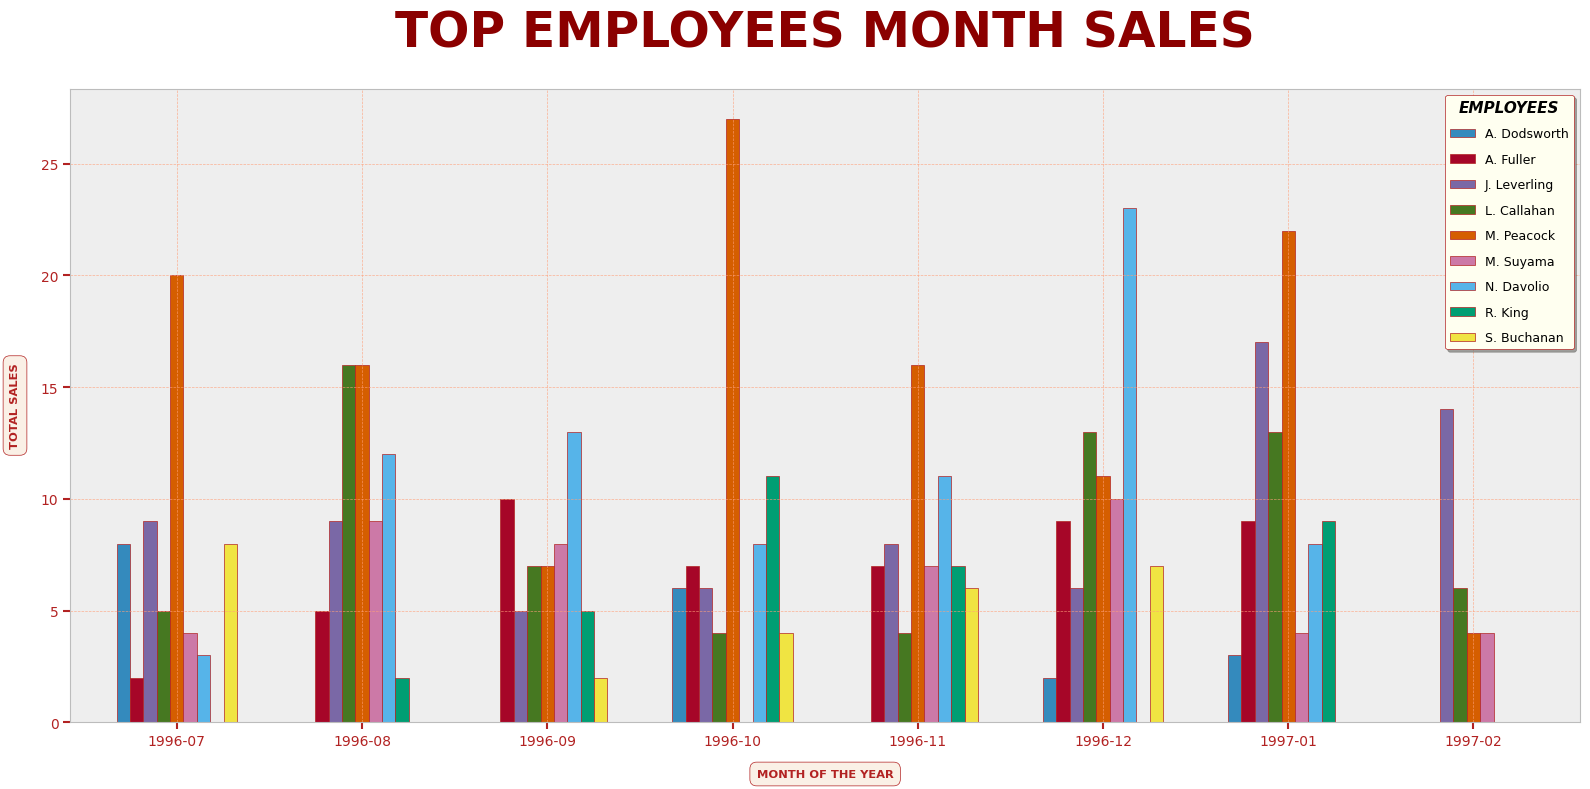

In [35]:
topEmpMonthSales = conn_db( query = '''
                                        SELECT	STRFTIME( '%Y-%m', o.OrderDate ) AS Month,
                                                SUBSTR( e.FirstName, 1, 1 ) || ". " || e.LastName AS Employee,
                                                COUNT(o.OrderID) AS TotalSales                                                 
                                        
                                        FROM [Employees] e
                                        JOIN [Orders] o ON e.EmployeeID = o.EmployeeID
                                        JOIN [OrderDetails] od ON od.OrderID = O.OrderID
                                        
                                        GROUP BY Month, Employee
                                        ORDER BY TotalSales DESC, Month
                                    ''',
                                 
                            columns = [ 'MONTH', 'EMPLOYEE', 'TOTAL SALES' ] )

print("\n==[ TOP EMPLOYEES MONTH SALES ]==")
print( tabulate( topEmpMonthSales, headers = "keys", tablefmt = "pretty" ) )


# GRÁFICA MATPLOTLIB (pivot_table)
#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
plt.style.use( "bmh" )

p_table = topEmpMonthSales.pivot_table( index = "MONTH", columns = "EMPLOYEE", values = "TOTAL SALES", 
                                        aggfunc = "sum", fill_value = None )
p_table.plot( kind = "bar", figsize = ( 16, 8 ), edgecolor = "firebrick", width = 0.65 )

plt.title( "TOP EMPLOYEES MONTH SALES", 
           fontsize = 35, color = "darkred", fontweight = "bold", pad = 30 )
plt.xlabel( "MONTH OF THE YEAR", 
            labelpad = 15, fontsize = 8.25, color = "firebrick",
            fontweight = "bold", bbox = { 'boxstyle': 'round', 
                                          'facecolor': 'linen',
                                          'edgecolor': 'firebrick', 
                                          'pad': 0.6 } )
plt.ylabel( "TOTAL SALES", 
            labelpad = 15, fontsize = 8.25, color = "firebrick", 
            fontweight = "bold", bbox = { 'boxstyle': 'round', 
                                          'facecolor': 'linen',
                                          'edgecolor': 'firebrick', 
                                          'pad': 0.6 } )

plt.tick_params( direction = "out", length = 5, width = 1.5, 
                 rotation = 0, colors = "firebrick", labelsize = 10,
                 grid_color = "lightsalmon", grid_alpha = 0.8  )

plt.legend( title = "EMPLOYEES", loc = "best", bbox_to_anchor = ( 1, 1 ), 
            facecolor= "ivory", edgecolor = "firebrick", shadow = True, 
            fontsize = 9, labelspacing = 1.0, borderaxespad = 0.5,
            title_fontproperties = { 'weight': 'bold', 'size': 11, 
                                     'style': 'italic' } )

plt.tight_layout()
plt.show()
#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

¨
 ## <font color="lightgreen" size=5>**> 10. CUSTOMER AVERAGE TICKET**</font>


==[ AVERAGE TICKET BY CUSTOMER ]==
+----+------------------------------+-----------+----------------+
|    |           CUSTOMER           |  COUNTRY  | AVERAGE TICKET |
+----+------------------------------+-----------+----------------+
| 0  |       Suprêmes délices       |  Belgium  |     3240.0     |
| 1  |        Mère Paillarde        |  Canada   |     2500.0     |
| 2  |     GROSELLA Restaurante     | Venezuela |     1237.9     |
| 3  |     Blondel père et fils     |  France   |     1170.0     |
| 4  |       HILARIÓN Abastos       | Venezuela |     1097.5     |
| 5  |      Eastern Connection      |    UK     |     1080.0     |
| 6  |      Seven Seas Imports      |    UK     |     977.2      |
| 7  |        Queen Cozinha         |  Brazil   |     972.0      |
| 8  |         Ernst Handel         |  Austria  |     950.0      |
| 9  |        Frankenversand        |  Germany  |     920.0      |
| 10 |    Morgenstern Gesundkost    |  Germany  |     912.0      |
| 11 | Hungry Owl All-Nigh

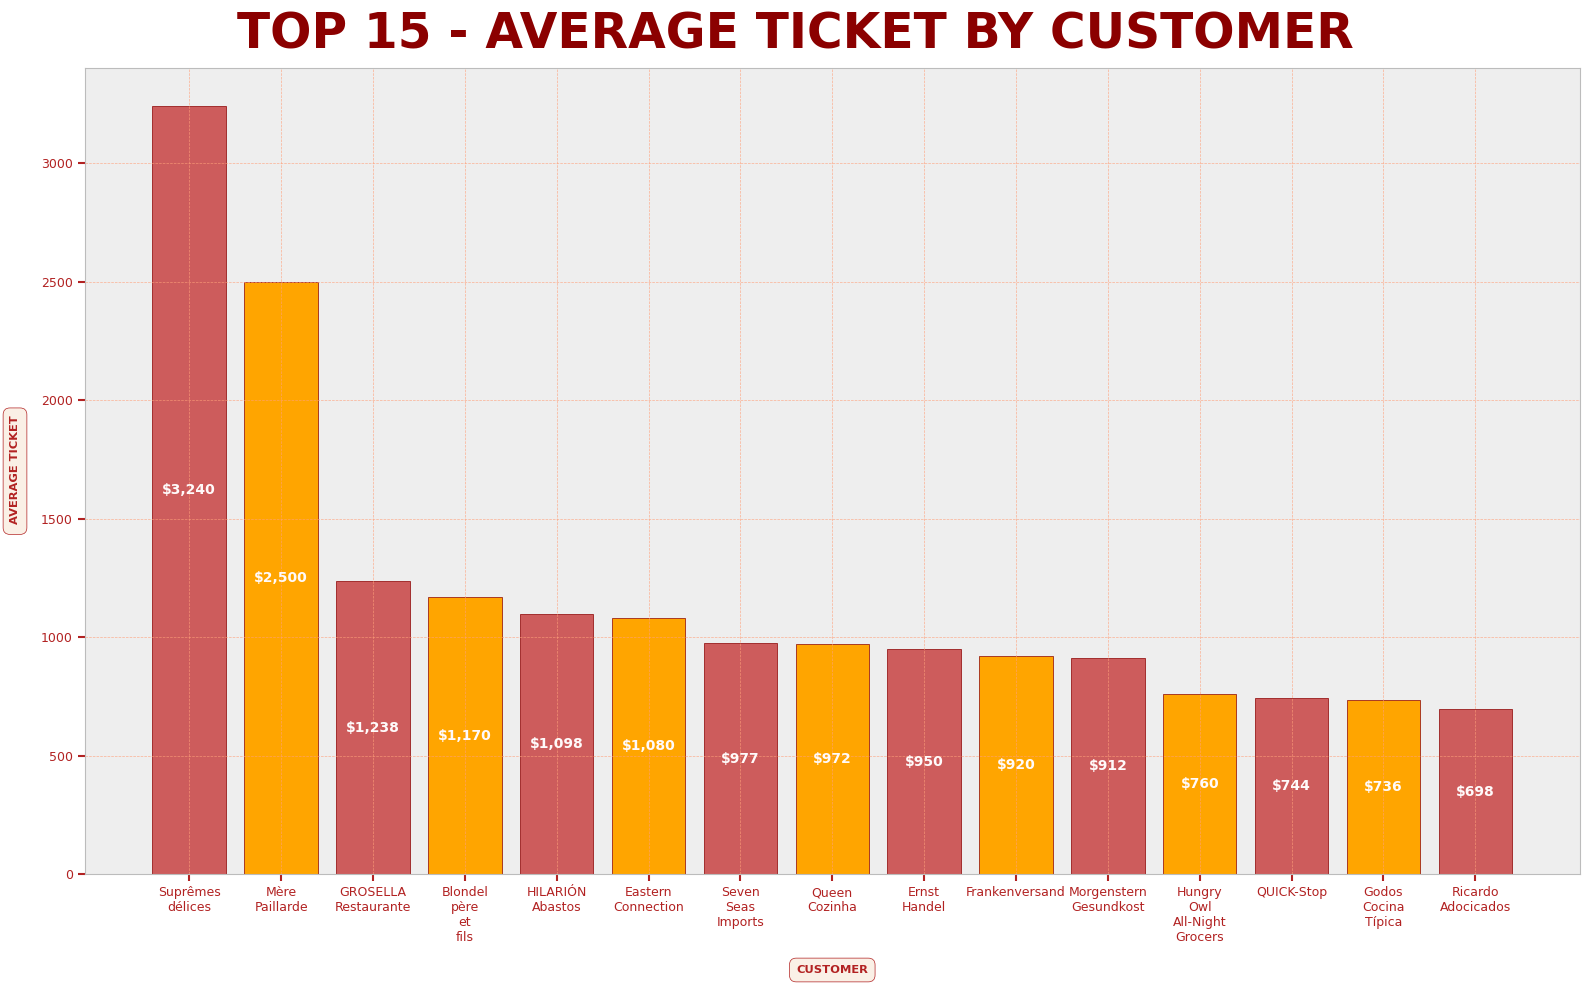

In [36]:
avgTicketCustomer = conn_db( query = '''
                                        SELECT 	c.CustomerName, c.Country,
                                                ROUND( (od.Quantity * p.Price / 1.00), 2 ) AS AvgPriceTicket

                                        FROM 	[Customers] c
                                        JOIN 	[Orders] o 
                                                    ON o.CustomerID = c.CustomerID
                                        JOIN 	[OrderDetails] od 
                                                    ON od.OrderID = o.OrderID
                                        JOIN 	[Products] p 
                                                    ON p.ProductID = od.ProductID

                                        GROUP BY c.CustomerName
                                        ORDER BY AvgPriceTicket DESC
                                        
                                        LIMIT 15
                                     ''',
                                 
                            columns = [ 'CUSTOMER', 'COUNTRY', 'AVERAGE TICKET' ] )

print("\n==[ AVERAGE TICKET BY CUSTOMER ]==")
print( tabulate( avgTicketCustomer, headers = "keys", tablefmt = "pretty" ) )



# GRÁFICA MATPLOTLIB
#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
customer = avgTicketCustomer[ "CUSTOMER" ].apply( lambda x: x.replace(" ", "\n") ) 
avg_ticket = avgTicketCustomer[ "AVERAGE TICKET" ]
#¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨
plt.style.use( "bmh" )

fig, ax = plt.subplots( nrows = 1, ncols = 1, 
                        figsize = ( 16, 10 ) )

plt.suptitle( "TOP 15 - AVERAGE TICKET BY CUSTOMER", 
              fontsize = 35, color = "darkred", fontweight = "bold" )
#¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨
bar_avgticket = plt.bar( x = customer, height = avg_ticket,
                         color = [ "indianred", "orange" ], 
                         edgecolor = "darkred" )

plt.bar_label( bar_avgticket, fmt = "${:,.0f}", label_type = "center",
               fontsize = 10, fontweight = "bold", color = "snow" )
#¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨
plt.xlabel( "CUSTOMER", 
            labelpad = 15, fontsize = 8.25, color = "firebrick", 
            fontweight = "bold", bbox = { 'boxstyle': 'round', 
                                          'facecolor': 'linen',
                                          'edgecolor': 'firebrick', 
                                          'pad': 0.6 } )
plt.ylabel( " AVERAGE TICKET", 
            labelpad = 15, fontsize = 8.25, color = "firebrick", 
            fontweight = "bold", bbox = { 'boxstyle': 'round', 
                                          'facecolor': 'linen',
                                          'edgecolor': 'firebrick', 
                                          'pad': 0.6 } )

plt.tick_params( direction = "out", length = 5, width = 1.5, 
                 colors = "firebrick", labelsize = 9,
                 grid_color = "lightsalmon", grid_alpha = 0.8 )
#¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨
plt.tight_layout()
plt.show()
#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

¨
 ## <font color="lightgreen" size=5>**> 11. MOST EFFICIENT EMPLOYEES**</font>


==[ MOST EFFICIENT EMPLOYEES ]==
+---+--------------+-------------+----------------+--------------------+
|   |   EMPLOYEE   | TOTAL SALES | TOTAL REVENUES | AVG. REVENUE ORDER |
+---+--------------+-------------+----------------+--------------------+
| 0 |  M. Peacock  |    3232     |    31189.0     |        10.0        |
| 1 |  N. Davolio  |    1924     |    36556.0     |        19.0        |
| 2 | J. Leverling |    1725     |    36225.0     |        21.0        |
| 3 |  A. Fuller   |    1315     |    51285.0     |        39.0        |
| 4 | L. Callahan  |    1293     |    27606.0     |        21.0        |
| 5 |  M. Suyama   |    1094     |    25436.0     |        23.0        |
| 6 | S. Buchanan  |     778     |    16338.0     |        21.0        |
| 7 |   R. King    |     733     |     7330.0     |        10.0        |
| 8 | A. Dodsworth |     649     |    12331.0     |        19.0        |
+---+--------------+-------------+----------------+--------------------+


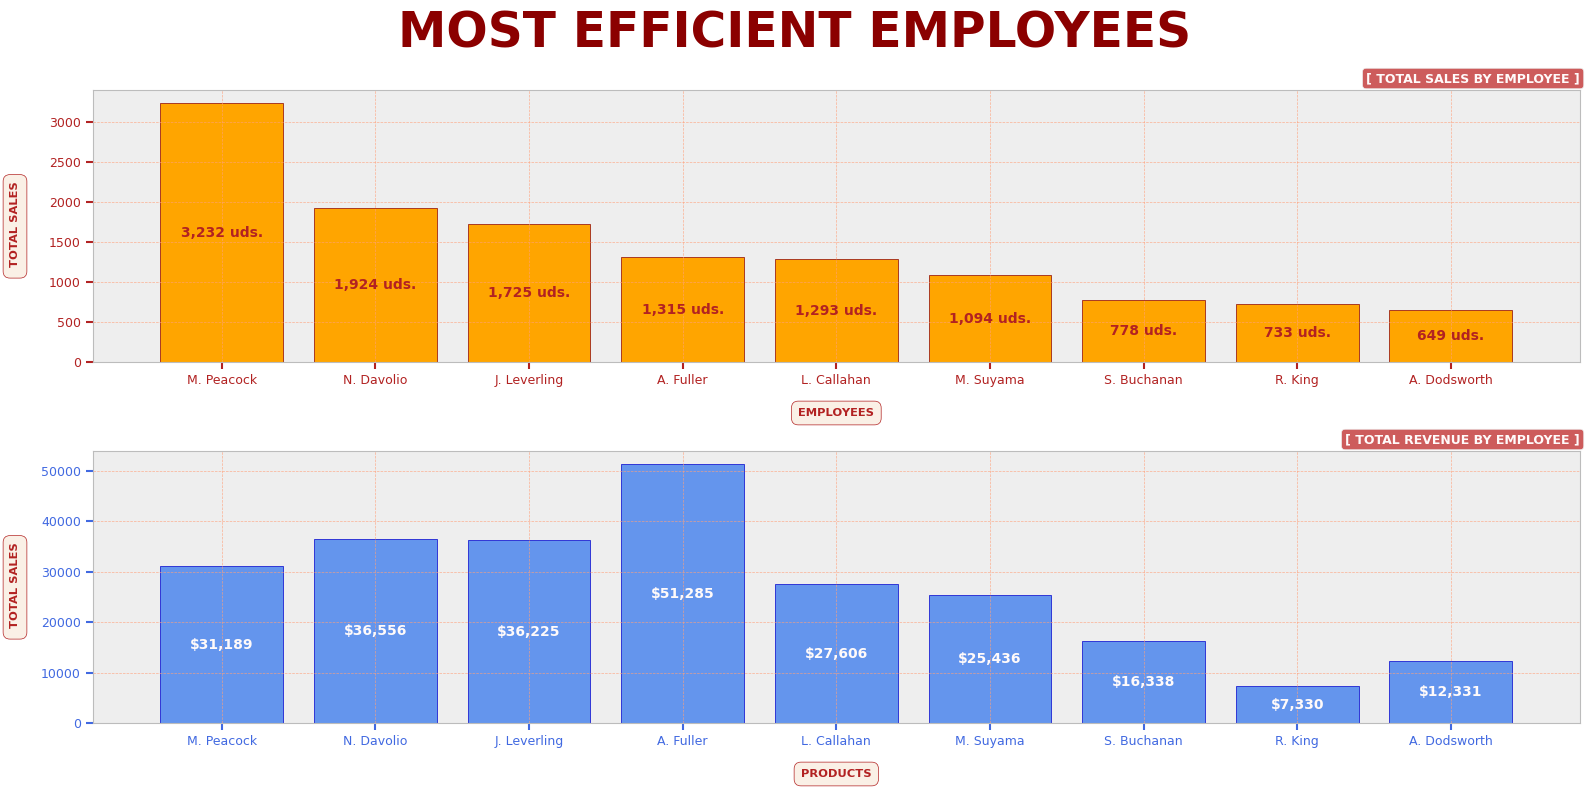

In [37]:
mostEfficEmployee = conn_db( query = '''
                                        SELECT  SUBSTR( e.FirstName, 1, 1 ) || ". " || e.LastName AS Employee,
                                                SUM( od.Quantity ) AS Sales,
                                                ROUND( SUM( od.Quantity )* p.Price ) AS Revenues,
                                                ROUND( ROUND( SUM( od.Quantity )* p.Price ) / SUM( od.Quantity ) ) AS AvgRevSale

                                        FROM [Employees] e
                                        JOIN [Orders] o 
                                            ON o.EmployeeID = e.EmployeeID
                                        JOIN [OrderDetails] od 
                                            ON od.OrderID = o.OrderID
                                        JOIN [Products] p
                                            ON od.ProductID = p.ProductID

                                        GROUP BY e.EmployeeID
                                        ORDER BY Sales DESC
                                     ''',
                                  
                             columns = [ 'EMPLOYEE', 'TOTAL SALES', 'TOTAL REVENUES', 'AVG. REVENUE ORDER' ] )

print("\n==[ MOST EFFICIENT EMPLOYEES ]==")
print( tabulate( mostEfficEmployee, headers = "keys", tablefmt= "pretty" ) )



# GRÁFICA MATPLOTLIB
#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
employee    = mostEfficEmployee[ "EMPLOYEE" ]
sales       = mostEfficEmployee[ "TOTAL SALES" ]
revenue     = mostEfficEmployee[ "TOTAL REVENUES" ]
avg_revOrd  = mostEfficEmployee[ "AVG. REVENUE ORDER" ]
#¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨
plt.style.use( "bmh" )

fig, ( ax1, ax2 )  = plt.subplots( nrows = 2, ncols = 1, 
                                   figsize = ( 16, 8 ) )

fig.align_labels()

plt.suptitle( "MOST EFFICIENT EMPLOYEES", 
              fontsize = 35, color = "darkred", fontweight = "bold" )
#¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨
# PLOT 1
#¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨
plt.subplot( 211 )
plt.title( "[ TOTAL SALES BY EMPLOYEE ]", 
           color = "snow", fontweight = "bold", fontsize = 9, 
           loc = "right", bbox={ 'facecolor':'indianred', 
                                 'boxstyle': 'round, pad=0.30' } )

bar_profitab = plt.bar( x = employee, height = sales, 
                        edgecolor = "darkred", 
                        color = "orange" )

plt.bar_label( bar_profitab, fmt = "{:,.0f} uds.", label_type = "center",
               fontsize = 10, fontweight = "bold", color = "firebrick" )

plt.xlabel( "EMPLOYEES", 
            labelpad = 15, fontsize = 8.25, color = "firebrick", 
            fontweight = "bold", bbox = { 'boxstyle': 'round', 
                                          'facecolor': 'linen',
                                          'edgecolor': 'firebrick', 
                                          'pad': 0.6 } )
plt.ylabel( " TOTAL SALES", 
            labelpad = 15, fontsize = 8.25, color = "firebrick", 
            fontweight = "bold", bbox = { 'boxstyle': 'round', 
                                          'facecolor': 'linen',
                                          'edgecolor': 'firebrick', 
                                          'pad': 0.6 } )

plt.tick_params( direction = "out", length = 5, width = 1.5, 
                 colors = "firebrick", labelsize = 9, rotation = 0, 
                 grid_color = "lightsalmon", grid_alpha = 0.8 )
#¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨
# PLOT 2
#¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨¨
plt.subplot( 212 )
plt.title( "[ TOTAL REVENUE BY EMPLOYEE ]", 
           color = "snow", fontweight = "bold", fontsize = 9, 
           loc = "right", bbox={ 'facecolor':'indianred', 
                                 'boxstyle': 'round, pad=0.30' } )

bar_sales = plt.bar( x = employee, height = revenue, 
                     edgecolor = "mediumblue", 
                     color = "cornflowerblue" )

plt.bar_label( bar_sales, fmt = "${:,.0f}", label_type = "center",
               fontsize = 10, fontweight = "bold", color = "snow" )

plt.xlabel( "PRODUCTS", 
            labelpad = 15, fontsize = 8.25, color = "firebrick", 
            fontweight = "bold", bbox = { 'boxstyle': 'round', 
                                          'facecolor': 'linen',
                                          'edgecolor': 'firebrick', 
                                          'pad': 0.6 }  )
plt.ylabel( " TOTAL SALES", 
            labelpad = 15, fontsize = 8.25, color = "firebrick", 
            fontweight = "bold", bbox = { 'boxstyle': 'round', 
                                          'facecolor': 'linen',
                                          'edgecolor': 'firebrick', 
                                          'pad': 0.6 } )

plt.tick_params( direction = "out", length = 5, width = 1.5, 
                 colors = "royalblue", labelsize = 9, rotation = 0, 
                 grid_color = "lightsalmon", grid_alpha = 0.8 )

plt.tight_layout()
plt.show()
#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^